# Visualization

> ## Collaborative Filtering
>
> ### 2022-1 AI Capstone Ratio Project

### Duration

2022-03-02 ~ 2022-06-07

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
userEmbedding = pd.read_csv('mapo_users_embedding.csv', index_col='user')
userEmbedding

0         1         2         3  \
user                                                                   
01WPXP7OfDQtMeFqczOs0yoKms32  0.000127  0.015524 -0.004714 -0.003567   
0ChSzKE66sQX8VyC96HbVj3dK3e2  0.287781  0.000612  0.047849 -0.040572   
0gVyJmbbAzf771Qk0SvD6c1RRYY2  0.000062  0.002073  0.000486 -0.000235   
16viBpfO0tc2DcTfeTa9TjN6Nam2  0.003578  0.138963  0.156107  0.319751   
2Ea7BdHDdPbCo4XngUzyIX2yBou1  0.004342  0.575709 -0.198878 -0.163604   
...                                ...       ...       ...       ...   
watlo38e0TU89EyhbKwxSXX5IPN2  0.000256  0.026797 -0.008213 -0.007316   
yjCBTfEVL0dwmUFzU3GvqroV0XC3  0.000678  0.017376  0.023176  0.032256   
yrAH0r8mtkQNNejCKdBi5towyCv1  0.000058  0.002783  0.004092  0.007518   
yrNIQAh3qiOfYaOnfCBUloEftbm1  0.000296  0.000741  0.002932 -0.001644   
zWpiirYETyPonGd1JQmoj31SQMX2  0.000079  0.001276  0.002727  0.003712   

                                     4         5         6         7  \
user                                                                   
01WPXP7OfDQtMeFqczOs0yoKms32 -0.000113  0.000577  0.009061  0.005343   
0ChSzKE66sQX8VyC96HbVj3dK3e2 -0.010277 -0.143166 -0.003237 -0.035482   
0gVyJmbbAzf771Qk0SvD6c1RRYY2  0.000372  0.001425 -0.002475  0.010092   
16viBpfO0tc2DcTfeTa9TjN6Nam2 -0.125823 -0.014861 -0.011118 -0.084226   
2Ea7BdHDdPbCo4XngUzyIX2yBou1 -0.009329 -0.005770  0.583906 -0.072943   
...                                ...       ...       ...       ...   
watlo38e0TU89EyhbKwxSXX5IPN2  0.000567  0.001166 -0.014763  0.008652   
yjCBTfEVL0dwmUFzU3GvqroV0XC3  0.026499  0.001664 -0.015069  0.002223   
yrAH0r8mtkQNNejCKdBi5towyCv1 -0.001747  0.000430  0.000282  0.009769   
yrNIQAh3qiOfYaOnfCBUloEftbm1  0.000085  0.001486  0.000225  0.003250   
zWpiirYETyPonGd1JQmoj31SQMX2  0.022309 -0.001727  0.000774 -0.005758   

                                     8         9  ...        43        44  \
user                                              ...                       
01WPXP7OfDQtMeFqczOs0yoKms32 -0.004472  0.007093  ... -0.019848  0.195710   
0ChSzKE66sQX8VyC96HbVj3dK3e2  0.030420  0.518913  ... -0.000186  0.000319   
0gVyJmbbAzf771Qk0SvD6c1RRYY2 -0.007325 -0.000034  ... -0.103746  0.300936   
16viBpfO0tc2DcTfeTa9TjN6Nam2 -0.088960  0.000641  ... -0.005158  0.004968   
2Ea7BdHDdPbCo4XngUzyIX2yBou1  0.050921 -0.134762  ...  0.021406 -0.016660   
...                                ...       ...  ...       ...       ...   
watlo38e0TU89EyhbKwxSXX5IPN2 -0.005243 -0.009102  ... -0.233129  0.669558   
yjCBTfEVL0dwmUFzU3GvqroV0XC3 -0.008388  0.017900  ...  0.160191  0.059035   
yrAH0r8mtkQNNejCKdBi5towyCv1  0.018687 -0.001590  ...  0.007493  0.004884   
yrNIQAh3qiOfYaOnfCBUloEftbm1 -0.002784 -0.001761  ...  0.023597  0.000066   
zWpiirYETyPonGd1JQmoj31SQMX2  0.000360 -0.000315  ...  0.011976 -0.003900   

                                    45        46        47        48  \
user                                                                   
01WPXP7OfDQtMeFqczOs0yoKms32  0.408811 -0.097607  0.592895 -0.486628   
0ChSzKE66sQX8VyC96HbVj3dK3e2 -0.000526 -0.004079 -0.000265  0.000288   
0gVyJmbbAzf771Qk0SvD6c1RRYY2 -0.026990  0.025904 -0.143435  0.094101   
16viBpfO0tc2DcTfeTa9TjN6Nam2 -0.014680  0.004216 -0.000794 -0.007125   
2Ea7BdHDdPbCo4XngUzyIX2yBou1 -0.005423 -0.001717  0.008545 -0.005065   
...                                ...       ...       ...       ...   
watlo38e0TU89EyhbKwxSXX5IPN2  0.221314  0.030343 -0.276277  0.041223   
yjCBTfEVL0dwmUFzU3GvqroV0XC3 -0.020348  0.000925  0.000094  0.029248   
yrAH0r8mtkQNNejCKdBi5towyCv1 -0.003199 -0.000540  0.010521  0.017198   
yrNIQAh3qiOfYaOnfCBUloEftbm1  0.008859 -0.014710  0.043355  0.047976   
zWpiirYETyPonGd1JQmoj31SQMX2  0.004339 -0.004821 -0.002421  0.014792   

                                    49  average_distance_rs_categorized  \
user                                                                      
01WPXP7OfDQtMeFqczOs0yoKms32  0.068334                              3.0   

In [3]:
pca = PCA(n_components=2)
userPoints = pca.fit_transform(userEmbedding)

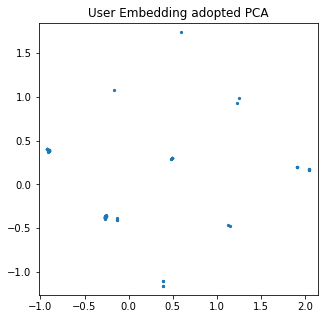

In [4]:
plt.rcParams['figure.figsize'] = [5, 5] # you can change size for your style
plt.xlim(userPoints[:,0].min()-0.1, userPoints[:,0].max()+0.1) # 축 범위 조정
plt.ylim(userPoints[:,1].min()-0.1, userPoints[:,1].max()+0.1) # 축 범위 조정

plt.scatter(userPoints[:,0],userPoints[:,1], s=5)

plt.title('User Embedding adopted PCA')
plt.show()

In [5]:
userBasedSimilarity = cosine_similarity(userEmbedding.values)
userBasedSimilarity = pd.DataFrame(userBasedSimilarity, index=userEmbedding.index, columns=userEmbedding.index)
userBasedSimilarity

user                          01WPXP7OfDQtMeFqczOs0yoKms32  \
user                                                         
01WPXP7OfDQtMeFqczOs0yoKms32                      1.000000   
0ChSzKE66sQX8VyC96HbVj3dK3e2                      0.726942   
0gVyJmbbAzf771Qk0SvD6c1RRYY2                      0.807662   
16viBpfO0tc2DcTfeTa9TjN6Nam2                      0.848927   
2Ea7BdHDdPbCo4XngUzyIX2yBou1                      0.726828   
...                                                    ...   
watlo38e0TU89EyhbKwxSXX5IPN2                      0.682551   
yjCBTfEVL0dwmUFzU3GvqroV0XC3                      0.827801   
yrAH0r8mtkQNNejCKdBi5towyCv1                      0.711912   
yrNIQAh3qiOfYaOnfCBUloEftbm1                      0.837874   
zWpiirYETyPonGd1JQmoj31SQMX2                      0.836062   

user                          0ChSzKE66sQX8VyC96HbVj3dK3e2  \
user                                                         
01WPXP7OfDQtMeFqczOs0yoKms32                      0.726942   
0ChSzKE66sQX8VyC96HbVj3dK3e2                      1.000000   
0gVyJmbbAzf771Qk0SvD6c1RRYY2                      0.847221   
16viBpfO0tc2DcTfeTa9TjN6Nam2                      0.834085   
2Ea7BdHDdPbCo4XngUzyIX2yBou1                      0.750044   
...                                                    ...   
watlo38e0TU89EyhbKwxSXX5IPN2                      0.774747   
yjCBTfEVL0dwmUFzU3GvqroV0XC3                      0.790885   
yrAH0r8mtkQNNejCKdBi5towyCv1                      0.816409   
yrNIQAh3qiOfYaOnfCBUloEftbm1                      0.863663   
zWpiirYETyPonGd1JQmoj31SQMX2                      0.863115   

user                          0gVyJmbbAzf771Qk0SvD6c1RRYY2  \
user                                                         
01WPXP7OfDQtMeFqczOs0yoKms32                      0.807662   
0ChSzKE66sQX8VyC96HbVj3dK3e2                      0.847221   
0gVyJmbbAzf771Qk0SvD6c1RRYY2                      1.000000   
16viBpfO0tc2DcTfeTa9TjN6Nam2                      0.942036   
2Ea7BdHDdPbCo4XngUzyIX2yBou1                      0.845104   
...                                                    ...   
watlo38e0TU89EyhbKwxSXX5IPN2                      0.933841   
yjCBTfEVL0dwmUFzU3GvqroV0XC3                      0.894485   
yrAH0r8mtkQNNejCKdBi5towyCv1                      0.922376   
yrNIQAh3qiOfYaOnfCBUloEftbm1                      0.973515   
zWpiirYETyPonGd1JQmoj31SQMX2                      0.975962   

user                          16viBpfO0tc2DcTfeTa9TjN6Nam2  \
user                                                         
01WPXP7OfDQtMeFqczOs0yoKms32                      0.848927   
0ChSzKE66sQX8VyC96HbVj3dK3e2                      0.834085   
0gVyJmbbAzf771Qk0SvD6c1RRYY2                      0.942036   
16viBpfO0tc2DcTfeTa9TjN6Nam2                      1.000000   
2Ea7BdHDdPbCo4XngUzyIX2yBou1                      0.834102   
...                                                    ...   
watlo38e0TU89EyhbKwxSXX5IPN2                      0.888467   
yjCBTfEVL0dwmUFzU3GvqroV0XC3                      0.923492   
yrAH0r8mtkQNNejCKdBi5towyCv1                      0.937674   
yrNIQAh3qiOfYaOnfCBUloEftbm1                      0.960269   
zWpiirYETyPonGd1JQmoj31SQMX2                      0.960224   

user                          2Ea7BdHDdPbCo4XngUzyIX2yBou1  \
user                                                         
01WPXP7OfDQtMeFqczOs0yoKms32                      0.726828   
0ChSzKE66sQX8VyC96HbVj3dK3e2                      0.750044   
0gVyJmbbAzf771Qk0SvD6c1RRYY2                      0.845104   
16viBpfO0tc2DcTfeTa9TjN6Nam2                      0.834102   
2Ea7BdHDdPbCo4XngUzyIX2yBou1                      1.000000   
...                                                    ...   
watlo38e0TU89EyhbKwxSXX5IPN2                      0.776393   
yjCBTfEVL0dwmUFzU3GvqroV0XC3                      0.790911   
yrAH0r8mtkQNNejCKdBi5towyCv1                      0.816460   
yrNIQAh3qiOfYaOnfCBUloEftbm1                      0.863655   
zWpiirYETyPonGd1JQmoj31SQMX2

In [6]:
def recommend_similar_user_by_user(user, n=10):
	global userBasedSimilarity
	return userBasedSimilarity[user].sort_values(ascending=False)[:n+1]

In [7]:
recommendation = recommend_similar_user_by_user('01WPXP7OfDQtMeFqczOs0yoKms32', 3)
recommendation

user
01WPXP7OfDQtMeFqczOs0yoKms32    1.000000
53hbvCs6pgMwZpEMtdsWWz0zeXJ2    0.932493
YDTSNtW1C4cAcGlAY2jwRrwMSi82    0.901905
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3    0.879169
Name: 01WPXP7OfDQtMeFqczOs0yoKms32, dtype: float64

In [8]:
userEmbedding.loc[recommendation.index.values]

0         1         2         3  \
user                                                                   
01WPXP7OfDQtMeFqczOs0yoKms32  0.000127  0.015524 -0.004714 -0.003567   
53hbvCs6pgMwZpEMtdsWWz0zeXJ2  0.000020  0.000022  0.000084 -0.000024   
YDTSNtW1C4cAcGlAY2jwRrwMSi82  0.000762  0.004830  0.007028 -0.001952   
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  0.001998  0.047226  0.084763  0.108284   

                                     4         5         6         7  \
user                                                                   
01WPXP7OfDQtMeFqczOs0yoKms32 -0.000113  0.000577  0.009061  0.005343   
53hbvCs6pgMwZpEMtdsWWz0zeXJ2 -0.000018 -0.000075  0.000011 -0.000051   
YDTSNtW1C4cAcGlAY2jwRrwMSi82  0.000694  0.005638  0.001051  0.028616   
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  0.483779 -0.015435  0.014074 -0.055654   

                                     8         9  ...        43        44  \
user                                              ...                       
01WPXP7OfDQtMeFqczOs0yoKms32 -0.004472  0.007093  ... -0.019848  0.195710   
53hbvCs6pgMwZpEMtdsWWz0zeXJ2 -0.000092  0.000091  ... -0.004560  0.002729   
YDTSNtW1C4cAcGlAY2jwRrwMSi82 -0.020002 -0.005087  ... -0.029343 -0.173048   
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  0.005658 -0.013623  ... -0.137346 -0.033041   

                                    45        46        47        48  \
user                                                                   
01WPXP7OfDQtMeFqczOs0yoKms32  0.408811 -0.097607  0.592895 -0.486628   
53hbvCs6pgMwZpEMtdsWWz0zeXJ2 -0.008004 -0.003825  0.013017  0.011656   
YDTSNtW1C4cAcGlAY2jwRrwMSi82  0.694267 -0.047626 -0.183964  0.284514   
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  0.005503  0.004087 -0.016826 -0.024009   

                                    49  average_distance_rs_categorized  \
user                                                                      
01WPXP7OfDQtMeFqczOs0yoKms32  0.068334                              3.0   
53hbvCs6pgMwZpEMtdsWWz0zeXJ2 -0.001016                              3.0   
YDTSNtW1C4cAcGlAY2jwRrwMSi82 -0.127808                              3.0   
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3 -0.038911                              2.0   

                              average_speed_rs_categorized  \
user                                                         
01WPXP7OfDQtMeFqczOs0yoKms32                           1.0   
53hbvCs6pgMwZpEMtdsWWz0zeXJ2                           2.0   
YDTSNtW1C4cAcGlAY2jwRrwMSi82                           2.0   
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3                           1.0   

                              increment_of_altitude_rs_categorized  
user                                                                
01WPXP7OfDQtMeFqczOs0yoKms32                                   1.0  
53hbvCs6pgMwZpEMtdsWWz0zeXJ2                                   1.0  
YDTSNtW1C4cAcGlAY2jwRrwMSi82                                   1.0  
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3                                   1.0  

[4 rows x 53 columns]

In [9]:
recommendMapoUsers = pd.read_csv('./mapo_users.csv')

In [10]:
removedIdx = [idx for idx, user in enumerate(recommendMapoUsers.user) if user not in recommendation.index.values]
len(removedIdx)

722271

In [11]:
recommendMapoUsers = recommendMapoUsers.drop(removedIdx)
recommendMapoUsers

user          log_file  \
230786  01WPXP7OfDQtMeFqczOs0yoKms32  log636082403.log   
230787  01WPXP7OfDQtMeFqczOs0yoKms32  log636082403.log   
230788  01WPXP7OfDQtMeFqczOs0yoKms32  log636094189.log   
230789  01WPXP7OfDQtMeFqczOs0yoKms32  log636096734.log   
230790  01WPXP7OfDQtMeFqczOs0yoKms32  log636096734.log   
...                              ...               ...   
712308  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660872343.log   
712309  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660883779.log   
712310  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660883779.log   
712311  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660958732.log   
712312  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660958732.log   

                              time     speed  distance    altitude  cadence  \
230786  2004-12-17 15:02:04.442773  0.453125  0.000000         NaN      NaN   
230787  2004-12-17 15:02:06.442773  0.453125       NaN   12.000000      NaN   
230788  2004-12-17 15:02:28.462814  1.835938  4.191406         NaN      NaN   
230789  2004-12-17 15:02:49.432950  0.429688  2.095703   15.693527      NaN   
230790  2004-12-17 15:02:51.432950       NaN       NaN   15.352608      NaN   
...                            ...       ...       ...         ...      ...   
712308  2004-12-18 04:29:10.294239  1.011719  2.135742         NaN      NaN   
712309  2004-12-18 04:31:38.631215  1.261719  2.136719         NaN      NaN   
712310  2004-12-18 04:31:40.631215       NaN       NaN  181.072083      NaN   
712311  2004-12-18 04:32:32.023539  1.000000  2.135742  102.070732      NaN   
712312  2004-12-18 04:32:34.023539       NaN       NaN  102.239304      NaN   

        heart_rate  power  calories  ...  balance_logger         bit11  \
230786         NaN    NaN  0.000000  ...             NaN           NaN   
230787         NaN    NaN  0.000000  ...             NaN -8.739113e-24   
230788         NaN    NaN  0.057617  ...             NaN -3.705685e-20   
230789         NaN    NaN       NaN  ...             NaN -2.203259e-23   
230790         NaN    NaN  0.000000  ...             NaN -1.571933e-23   
...            ...    ...       ...  ...             ...           ...   
712308         NaN    NaN  0.000000  ...             NaN -4.094059e-23   
712309         NaN    NaN       NaN  ...             NaN -3.969978e-23   
712310         NaN    NaN  0.057617  ...             NaN -9.402707e-24   
712311         NaN    NaN  0.000000  ...             NaN -4.114738e-23   
712312         NaN    NaN  0.057617  ...             NaN -3.907297e-23   

               bit12  bit13  bit14  bit15  start_latitude  start_longitude  \
230786           NaN    NaN    NaN    NaN       37.663373       126.764513   
230787  4.510816e+10    NaN    NaN    NaN       37.663373       126.764513   
230788 -2.042585e+28    NaN    NaN    NaN             NaN              NaN   
230789  1.212113e-38    NaN    NaN    NaN       37.614610       126.803227   
230790  1.129886e+37    NaN    NaN    NaN       37.614610       126.803227   
...              ...    ...    ...    ...             ...              ...   
712308 -2.841140e-22    NaN    NaN    NaN             NaN              NaN   
712309  3.332777e-15    NaN    NaN    NaN             NaN              NaN   
712310  3.893446e-38    NaN    NaN    NaN       37.391571       127.058025   
712311  1.298265e+34    NaN    NaN    NaN       37.323688       127.082540   
712312  2.600901e+28    NaN    NaN    NaN       37.323688       127.082540   

        current_latitude  current_longitude  
230786         37.663373         126.764513  
230787         37.663373         126.764513  
230788               NaN                NaN  
230789         37.614610         126.803227  
230790         37.614548         126.803314  
...                  ...                ...  
712308               NaN                NaN  
712309               NaN                NaN  
712310         37.391571         127.058025  
712311         37.323688         127.082540  
712312         37.323688         127.082540  

[8570 r

In [12]:
recommendMapoUsers = recommendMapoUsers.dropna(subset = ['current_latitude', 'current_longitude'])
recommendMapoUsers

user          log_file  \
230786  01WPXP7OfDQtMeFqczOs0yoKms32  log636082403.log   
230787  01WPXP7OfDQtMeFqczOs0yoKms32  log636082403.log   
230789  01WPXP7OfDQtMeFqczOs0yoKms32  log636096734.log   
230790  01WPXP7OfDQtMeFqczOs0yoKms32  log636096734.log   
230791  01WPXP7OfDQtMeFqczOs0yoKms32  log636952833.log   
...                              ...               ...   
712291  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log659750680.log   
712292  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log659750680.log   
712310  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660883779.log   
712311  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660958732.log   
712312  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660958732.log   

                              time     speed      distance    altitude  \
230786  2004-12-17 15:02:04.442773  0.453125      0.000000         NaN   
230787  2004-12-17 15:02:06.442773  0.453125           NaN   12.000000   
230789  2004-12-17 15:02:49.432950  0.429688      2.095703   15.693527   
230790  2004-12-17 15:02:51.432950       NaN           NaN   15.352608   
230791  2004-12-17 19:15:43.501918  5.238281  64872.625000   43.364433   
...                            ...       ...           ...         ...   
712291  2004-12-18 03:52:32.547019  0.527344           NaN  139.460938   
712292  2004-12-18 03:52:34.547019  0.371094     31.376953  119.000000   
712310  2004-12-18 04:31:40.631215       NaN           NaN  181.072083   
712311  2004-12-18 04:32:32.023539  1.000000      2.135742  102.070732   
712312  2004-12-18 04:32:34.023539       NaN           NaN  102.239304   

        cadence  heart_rate  power    calories  ...  balance_logger  \
230786      NaN         NaN    NaN    0.000000  ...             NaN   
230787      NaN         NaN    NaN    0.000000  ...             NaN   
230789      NaN         NaN    NaN         NaN  ...             NaN   
230790      NaN         NaN    NaN    0.000000  ...             NaN   
230791      NaN         NaN    NaN  679.993164  ...             NaN   
...         ...         ...    ...         ...  ...             ...   
712291      NaN         NaN    NaN    0.000000  ...             NaN   
712292      NaN         NaN    NaN    0.000000  ...             NaN   
712310      NaN         NaN    NaN    0.057617  ...             NaN   
712311      NaN         NaN    NaN    0.000000  ...             NaN   
712312      NaN         NaN    NaN    0.057617  ...             NaN   

               bit11         bit12  bit13  bit14  bit15  start_latitude  \
230786           NaN           NaN    NaN    NaN    NaN       37.663373   
230787 -8.739113e-24  4.510816e+10    NaN    NaN    NaN       37.663373   
230789 -2.203259e-23  1.212113e-38    NaN    NaN    NaN       37.614610   
230790 -1.571933e-23  1.129886e+37    NaN    NaN    NaN       37.614610   
230791 -7.030455e-24  3.467341e-33    NaN    NaN    NaN       37.623440   
...              ...           ...    ...    ...    ...             ...   
712291  9.792130e-27 -4.481555e-38    NaN    NaN    NaN       37.239951   
712292 -3.865052e-23  1.777763e-23    NaN    NaN    NaN       37.239951   
712310 -9.402707e-24  3.893446e-38    NaN    NaN    NaN       37.391571   
712311 -4.114738e-23  1.298265e+34    NaN    NaN    NaN       37.323688   
712312 -3.907297e-23  2.600901e+28    NaN    NaN    NaN       37.323688   

        start_longitude  current_latitude  current_longitude  
230786       126.764513         37.663373         126.764513  
230787       126.764513         37.663373         126.764513  
230789       126.803227         37.614610         126.803227  
230790       126.803227         37.614548         126.803314  
230791       126.787499         37.623440         126.787499  
...                 ...               ...                ...  
712291       127.175522         37.239951         127.175522  
712292       127.175522         37.240056         127.175850  
712310       127.058025         37.391571         127.058025  
712311       127.082540         37.323688         127.082540  

In [13]:
def concat_data(df:pd.DataFrame):
	return list(df.values)	

In [14]:
recommendMapoUsers = recommendMapoUsers.groupby(['user','log_file'])[['current_latitude', 'current_longitude']].apply(concat_data)
recommendMapoUsers = recommendMapoUsers.reset_index()
recommendMapoUsers = recommendMapoUsers.rename(columns={0:'path'})
recommendMapoUsers

user          log_file  \
0   01WPXP7OfDQtMeFqczOs0yoKms32  log636082403.log   
1   01WPXP7OfDQtMeFqczOs0yoKms32  log636096734.log   
2   01WPXP7OfDQtMeFqczOs0yoKms32  log636952833.log   
3   01WPXP7OfDQtMeFqczOs0yoKms32  log637310266.log   
4   01WPXP7OfDQtMeFqczOs0yoKms32  log637378590.log   
5   53hbvCs6pgMwZpEMtdsWWz0zeXJ2  log619234267.log   
6   53hbvCs6pgMwZpEMtdsWWz0zeXJ2  log620130080.log   
7   53hbvCs6pgMwZpEMtdsWWz0zeXJ2  log620130431.log   
8   YDTSNtW1C4cAcGlAY2jwRrwMSi82  log606532970.log   
9   YDTSNtW1C4cAcGlAY2jwRrwMSi82  log608629520.log   
10  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log610256236.log   
11  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log610262937.log   
12  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log611765845.log   
13  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log613183314.log   
14  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log633403443.log   
15  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log633528076.log   
16  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log634555257.log   
17  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log634697348.log   
18  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log634779451.log   
19  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log635043768.log   
20  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log635074144.log   
21  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log636074714.log   
22  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log636074840.log   
23  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log636680234.log   
24  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log636769747.log   
25  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log637284357.log   
26  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log638065046.log   
27  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log638065085.log   
28  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log638081681.log   
29  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log639094824.log   
30  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log639706514.log   
31  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log640046009.log   
32  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log640999957.log   
33  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641555981.log   
34  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641559747.log   
35  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641889560.log   
36  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log644761493.log   
37  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log650064995.log   
38  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log651789946.log   
39  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log653357317.log   
40  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log653357325.log   
41  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log653357383.log   
42  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log653610788.log   
43  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log654993502.log   
44  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log655511940.log   
45  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log658454781.log   
46  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log659750680.log   
47  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660883779.log   
48  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log660958732.log   

                                                 path  
0   [[37.66337321875493, 126.76451342180373], [37....  
1   [[37.61461013864604, 126.8032269179821], [37.6...  
2   [[37.62344040279196, 126.7874987795949], [37.6...  
3   [[37.66295805097951, 126.76468533463776], [37....  
4   [[37.6418523005265, 126.77987636066972], [37.6...  
5   [[37.44403465021556, 126.7750792298466], [37.4...  
6          [[37.085418948257264, 126.91494687460364]]  
7           [[37.08545793087888, 126.91493329592048]]  
8   [[37.47695544668424, 126.9219818059355], [37.4...  
9   [[37.46480210432237, 126.88058274798097], [37....  
10  [[37.46335793576932, 126.87810908071695], [37....  
11  [[37.4622246427693, 126.87594478949904], [37.4...  
12  [[37.46463411729167, 126.8802953325212], [37.4...  
13  [[38.0649677616972, 128.17524941638112], [38.0...  
14          [[37.21656812222922, 127.19887328334153]]  
15  [[37.32375055250243, 127.08257043734191], [37....  
16  [[37.386423120571344, 127.12223226204516], [37...  
17           [[37.35566120357271, 127.1133981551975]]  
18  [[37.32377281518765, 127.0825801603496], [37.3...  
19  [[37.21651745918269, 127.19888309016824], [37....  
20  [[37.38633001493536, 127.12220116518438], [37....  
21  [[37.32376255035757, 127.08257814869285], [37....  
22          [[37.32134781009974, 127.08

In [15]:
recommendMapoUsers = recommendMapoUsers.drop(recommendMapoUsers[recommendMapoUsers.path.apply(len) <= 2].index)
recommendMapoUsers

user          log_file  \
2   01WPXP7OfDQtMeFqczOs0yoKms32  log636952833.log   
3   01WPXP7OfDQtMeFqczOs0yoKms32  log637310266.log   
4   01WPXP7OfDQtMeFqczOs0yoKms32  log637378590.log   
5   53hbvCs6pgMwZpEMtdsWWz0zeXJ2  log619234267.log   
8   YDTSNtW1C4cAcGlAY2jwRrwMSi82  log606532970.log   
9   YDTSNtW1C4cAcGlAY2jwRrwMSi82  log608629520.log   
10  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log610256236.log   
11  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log610262937.log   
12  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log611765845.log   
13  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log613183314.log   
16  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log634555257.log   
18  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log634779451.log   
19  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log635043768.log   
20  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log635074144.log   
21  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log636074714.log   
25  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log637284357.log   
27  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log638065085.log   
28  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log638081681.log   
30  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log639706514.log   
32  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log640999957.log   
33  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641555981.log   
34  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641559747.log   
35  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641889560.log   
38  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log651789946.log   
42  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log653610788.log   
43  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log654993502.log   
44  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log655511940.log   
45  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log658454781.log   

                                                 path  
2   [[37.62344040279196, 126.7874987795949], [37.6...  
3   [[37.66295805097951, 126.76468533463776], [37....  
4   [[37.6418523005265, 126.77987636066972], [37.6...  
5   [[37.44403465021556, 126.7750792298466], [37.4...  
8   [[37.47695544668424, 126.9219818059355], [37.4...  
9   [[37.46480210432237, 126.88058274798097], [37....  
10  [[37.46335793576932, 126.87810908071695], [37....  
11  [[37.4622246427693, 126.87594478949904], [37.4...  
12  [[37.46463411729167, 126.8802953325212], [37.4...  
13  [[38.0649677616972, 128.17524941638112], [38.0...  
16  [[37.386423120571344, 127.12223226204516], [37...  
18  [[37.32377281518765, 127.0825801603496], [37.3...  
19  [[37.21651745918269, 127.19888309016824], [37....  
20  [[37.38633001493536, 127.12220116518438], [37....  
21  [[37.32376255035757, 127.08257814869285], [37....  
25  [[37.32382093989185, 127.08258602768184], [37....  
27  [[37.21652346666034, 127.19884419813752], [37....  
28  [[37.21654402558024, 127.19895056448875], [37....  
30  [[37.32375575157322, 127.08254805766046], [37....  
32  [[37.51741860786147, 127.07872993312776], [37....  
33  [[37.56450193963759, 127.20689845271409], [37....  
34  [[37.56467534946256, 127.2068300563842], [37.5...  
35  [[37.34145356958608, 127.11496733129025], [37....  
38  [[37.406292800273455, 127.1239322796464], [37....  
42  [[37.34082596038683, 127.11436609737576], [37....  
43  [[37.54521465408705, 127.32862916775048], [37....  
44  [[37.33039093911621, 127.11231990717351], [37....  
45  [[37.46027377376091, 127.1521148364991], [37.4...

In [16]:
import folium

# 01WPXP7OfDQtMeFqczOs0yoKms32 유저의 log637378590.log 경로 시작 위치
baseLocation = [37.6418523005265, 126.77987636066972] 
visualizedPath = folium.Map(location=baseLocation, zoom_start=10)
visualizedPath

In [17]:
targetPathDataframe = recommendMapoUsers[recommendMapoUsers.user == '01WPXP7OfDQtMeFqczOs0yoKms32']
targetPathDataframe

user          log_file  \
2  01WPXP7OfDQtMeFqczOs0yoKms32  log636952833.log   
3  01WPXP7OfDQtMeFqczOs0yoKms32  log637310266.log   
4  01WPXP7OfDQtMeFqczOs0yoKms32  log637378590.log   

                                                path  
2  [[37.62344040279196, 126.7874987795949], [37.6...  
3  [[37.66295805097951, 126.76468533463776], [37....  
4  [[37.6418523005265, 126.77987636066972], [37.6...

In [18]:
def draw_path(df:pd.DataFrame):
	global visualizedPath
	COLORS = ['red', 'darkred', 'blue', 'darkblue', 'green', 'darkgreen']
	cnt = 0

	for user, logFile, path in df.values:
		folium.Marker(
			location=list(path[0]),
			popup=f'{user}\n{logFile}\nStart',
			icon=folium.Icon(color=COLORS[cnt%len(COLORS)], icon='star'),
		).add_to(visualizedPath)
		folium.Marker(
			location=list(path[-1]),
			popup=f'{user}\n{logFile}\nEnd',
			icon=folium.Icon(color=COLORS[cnt%len(COLORS)], icon='flag'),
		).add_to(visualizedPath)
		for i, location in enumerate(path[:-1]):
			line = [location, path[i+1]]
			folium.PolyLine(
				line,
				color=COLORS[cnt%len(COLORS)],
				weight=3,
				opacity=0.8
			).add_to(visualizedPath)
		cnt += 1

In [19]:
draw_path(targetPathDataframe)
visualizedPath

In [20]:
recommendPathDataframe = recommendMapoUsers.drop(targetPathDataframe.index)
recommendPathDataframe

user          log_file  \
5   53hbvCs6pgMwZpEMtdsWWz0zeXJ2  log619234267.log   
8   YDTSNtW1C4cAcGlAY2jwRrwMSi82  log606532970.log   
9   YDTSNtW1C4cAcGlAY2jwRrwMSi82  log608629520.log   
10  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log610256236.log   
11  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log610262937.log   
12  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log611765845.log   
13  YDTSNtW1C4cAcGlAY2jwRrwMSi82  log613183314.log   
16  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log634555257.log   
18  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log634779451.log   
19  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log635043768.log   
20  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log635074144.log   
21  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log636074714.log   
25  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log637284357.log   
27  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log638065085.log   
28  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log638081681.log   
30  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log639706514.log   
32  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log640999957.log   
33  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641555981.log   
34  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641559747.log   
35  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log641889560.log   
38  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log651789946.log   
42  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log653610788.log   
43  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log654993502.log   
44  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log655511940.log   
45  b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3  log658454781.log   

                                                 path  
5   [[37.44403465021556, 126.7750792298466], [37.4...  
8   [[37.47695544668424, 126.9219818059355], [37.4...  
9   [[37.46480210432237, 126.88058274798097], [37....  
10  [[37.46335793576932, 126.87810908071695], [37....  
11  [[37.4622246427693, 126.87594478949904], [37.4...  
12  [[37.46463411729167, 126.8802953325212], [37.4...  
13  [[38.0649677616972, 128.17524941638112], [38.0...  
16  [[37.386423120571344, 127.12223226204516], [37...  
18  [[37.32377281518765, 127.0825801603496], [37.3...  
19  [[37.21651745918269, 127.19888309016824], [37....  
20  [[37.38633001493536, 127.12220116518438], [37....  
21  [[37.32376255035757, 127.08257814869285], [37....  
25  [[37.32382093989185, 127.08258602768184], [37....  
27  [[37.21652346666034, 127.19884419813752], [37....  
28  [[37.21654402558024, 127.19895056448875], [37....  
30  [[37.32375575157322, 127.08254805766046], [37....  
32  [[37.51741860786147, 127.07872993312776], [37....  
33  [[37.56450193963759, 127.20689845271409], [37....  
34  [[37.56467534946256, 127.2068300563842], [37.5...  
35  [[37.34145356958608, 127.11496733129025], [37....  
38  [[37.406292800273455, 127.1239322796464], [37....  
42  [[37.34082596038683, 127.11436609737576], [37....  
43  [[37.54521465408705, 127.32862916775048], [37....  
44  [[37.33039093911621, 127.11231990717351], [37....  
45  [[37.46027377376091, 127.1521148364991], [37.4...

In [21]:
draw_path(recommendPathDataframe)
visualizedPath